# Market Microstrucure Lab 2



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
all_files = glob.glob(f"./Stocks/GOOG/cleaned_data/*.*")

In [3]:
df = pd.read_csv(all_files[0])
# display(df.head())
# display(df.columns)
# df.info()

In [4]:
df.DateTime = pd.to_datetime(df.DateTime, format='%Y-%m-%d %H:%M:%S:%f')
df.DateTime.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1391516 entries, 0 to 1391515
Series name: DateTime
Non-Null Count    Dtype         
--------------    -----         
1391516 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 10.6 MB


In [5]:
## Functions
class AggregatedTicks:
    def aggregate(df: pd.DataFrame, frequency: str) -> pd.DataFrame:
        grouped = df.groupby(pd.Grouper(key='DateTime', freq=frequency))
        out = grouped['midprice'].agg(open='first', high='max', low='min', close='last') \
                                 .assign(count=grouped['midprice'].size().values)
        return out.reset_index()
    
def kurtosis_calc(df):
    mean = df['log_return'].mean()
    mu2 = ((df['log_return']-mean)**2).mean()
    mu4 = ((df['log_return']-mean)**4).mean()
    kurtosis = (mu4/ (mu2**2))-3
    return kurtosis

def calculate_autocorr(df, lag, title):
    raw_returns = df['close'].diff().dropna()*100
    abs_returns = abs(raw_returns)
    raw = raw_returns.values
    absr = abs_returns.values
    raw_acf = []
    abs_acf = []
    mean_raw = np.mean(raw)
    mean_abs = np.mean(absr)
    for l in range(1, lag + 1):
        r_raw = np.sum((raw[:len(raw)-l] - mean_raw)*(raw[l:] - mean_raw)) / (len(raw) - l)
        r_abs = np.sum((absr[:len(absr)-l] - mean_abs)*(absr[l:] - mean_abs)) / (len(absr) - l)
        raw_acf.append(r_raw)
        abs_acf.append(r_abs)
    plt.figure(figsize=(20,5))
    plt.plot(range(1, lag + 1), raw_acf)
    plt.plot(range(1, lag + 1), abs_acf)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title(f'Autocorrelation of lag and absolute reurns at the {title} level')
    plt.legend(['Raw Returns', 'Absolute Returns'])
    plt.show()   

def calculate_squared_autocorr(df, lag, title):
    raw_returns = (df['log_return'].dropna()*100)**2
    raw = raw_returns.values
    raw_acf = []
    mean_raw = np.mean(raw)
    for l in range(1, lag + 1):
        r_raw = np.sum((raw[:len(raw)-l] - mean_raw)*(raw[l:] - mean_raw)) / (len(raw) - l)
        raw_acf.append(r_raw)
    plt.figure(figsize=(20,5))
    plt.plot(range(1, lag + 1), raw_acf)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title(f'Autocorrelation of squared reurns at the {title} level')
    plt.legend(['Raw Returns', 'Absolute Returns'])
    plt.show()   

def order_direction_autocorr(df, lag, title):
    raw_returns = df['Direction']
    raw = raw_returns.values
    raw_acf = []
    mean_raw = np.mean(raw)
    for l in range(1, lag + 1):
        r_raw = np.sum((raw[:len(raw)-l] - mean_raw)*(raw[l:] - mean_raw)) / (len(raw) - l)
        raw_acf.append(r_raw)
    plt.figure(figsize=(20,5))
    plt.plot(range(1, lag + 1), raw_acf)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title(f'Autocorrelation of squared reurns at the {title} level')
    plt.legend(['Raw Returns', 'Absolute Returns'])
    plt.show()   

## Q1. Calculate the Midprice



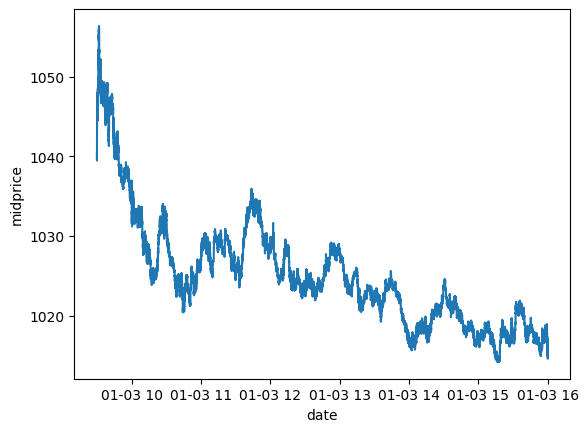

In [6]:
df['midprice'] = (df['Ask_Price_Level_1'] + df['Bid_Price_Level_1']) / 2
plt.plot(df.DateTime, df.midprice)
plt.xlabel('date')
plt.ylabel('midprice')
plt.show()

## Q2. Calculate Average Spread and Empirical Tick Size


The average spread is 1.050126049574711 which is 18 times the tick size, therefore this is likely a small tick stock as the spread is greater than the smallest tick size.


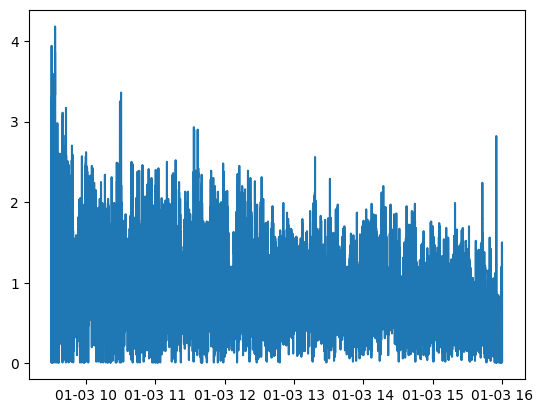

In [7]:
## Average Spread
df['spread'] = df['Ask_Price_Level_1'] - df['Bid_Price_Level_1']
df['spread'].head()
average_spread = df['spread'].mean()
print(f'The average spread is {average_spread} which is 18 times the tick size, therefore this is likely a small tick stock as the spread is greater than the smallest tick size.')
plt.plot(df.DateTime, df['spread'])
plt.show()


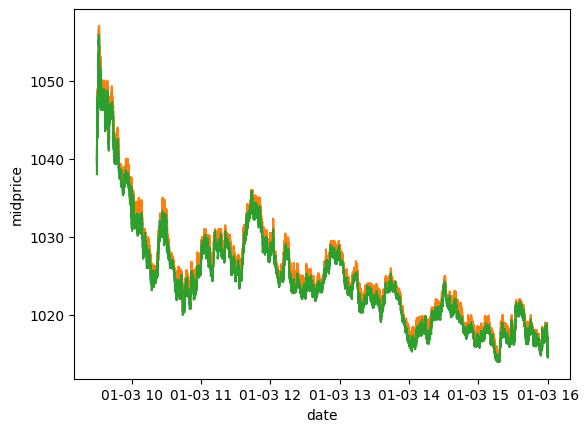

In [8]:
df['midprice'] = (df['Ask_Price_Level_1'] + df['Bid_Price_Level_1']) / 2
plt.plot(df.DateTime, df.midprice)
plt.plot(df.DateTime, df['Ask_Price_Level_1'])
plt.plot(df.DateTime, df['Bid_Price_Level_1'])
plt.xlabel('date')
plt.ylabel('midprice')
plt.show()

In [9]:
# Empirical tick size
## Calculate differences between levels at each time
bid_differences = df.iloc[:,4::4].diff(axis = 1)
# print(bid_differences.head())
bid_tick = (np.array(bid_differences.iloc[:,2:]).flatten().mean())

ask_differences = df.iloc[:,6::4].diff(axis = 1)
# print(ask_differences.head())
ask_tick = (np.array(ask_differences.iloc[:,2:]).flatten().mean())

empirical_tick_size = abs(ask_tick+bid_tick/2)
print(f"Empirical tick size for TSLA is {round(empirical_tick_size, 2)} which implies a small tick stock as the movements are generally greater than one tick.")

Empirical tick size for TSLA is 0.12 which implies a small tick stock as the movements are generally greater than one tick.


## Q3 Compute aggregated data, log return, and plot


In [10]:
df_1s = AggregatedTicks.aggregate(df, '1s')
df_10s = AggregatedTicks.aggregate(df, '10s')
df_60s = AggregatedTicks.aggregate(df, '60s')
df_600s = AggregatedTicks.aggregate(df, '600s')


In [11]:
datasets = [df_1s, df_10s, df_60s, df_600s]
for data in datasets:
    data['log_return'] = np.log(data['close'])- np.log(data['close'].shift(-1)).dropna()


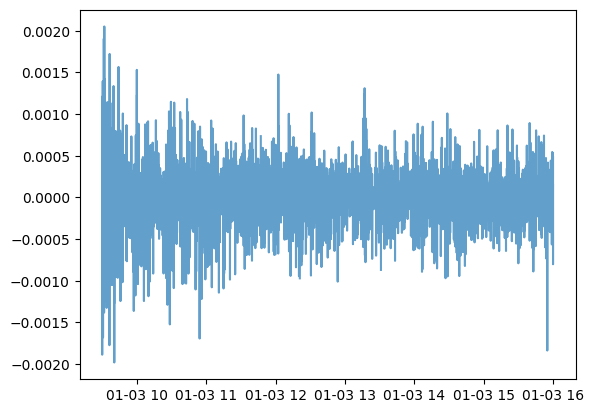

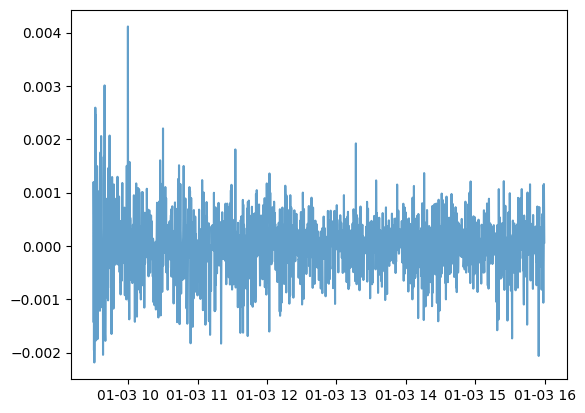

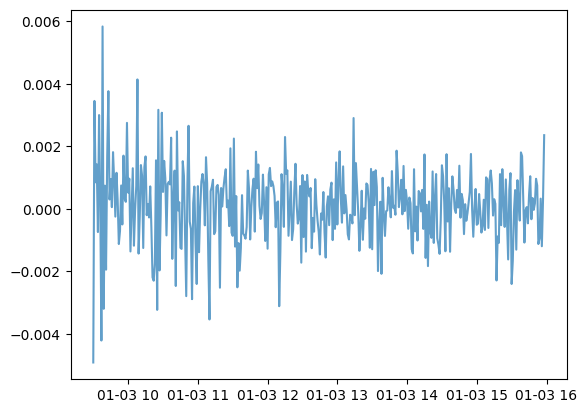

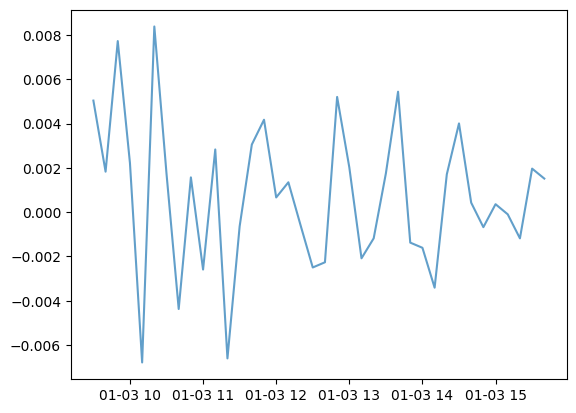

In [12]:
for data in datasets:
    plt.plot(data['DateTime'], data['log_return'], alpha = 0.7)
    plt.show()

Return behavouir changes as the sampling frequency in a few ways. Firstly, of course it is sparcer. Looking at higher frequency data it is very hard to tell how the stock moved throughout the day, even at the 1 min frequency it is not clear at all. the volatility seems to increase at as frequency decreases as most of the small movements are near to 0. 

## Q4 Histograms as comparaed to normal

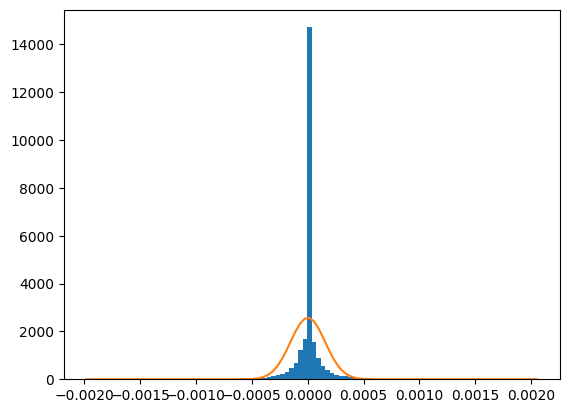

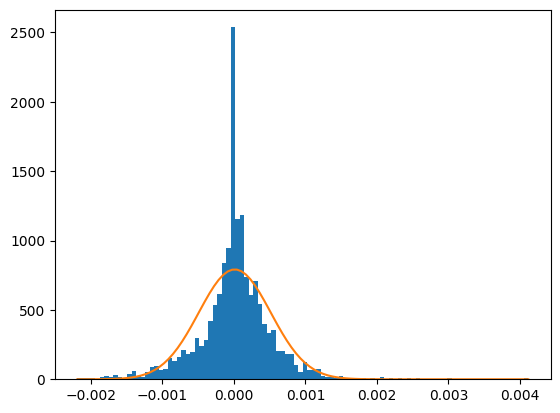

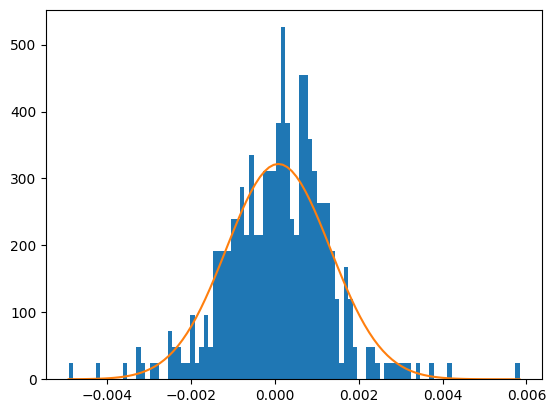

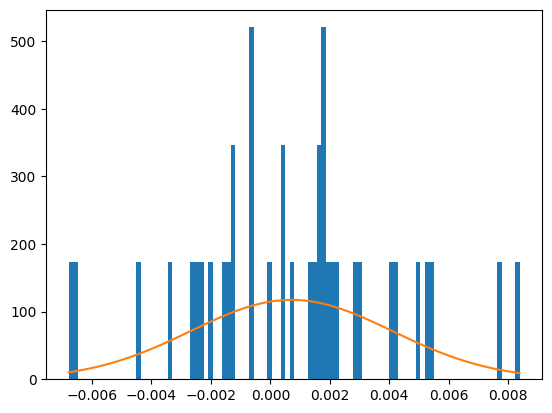

In [13]:
for data in datasets:
    mean = data['log_return'].mean()
    sd = data['log_return'].std()
    x = np.linspace(min(data['log_return']), max(data['log_return']), 100)
    pdf = np.exp(-(x-mean)**2/(2*sd**2))/np.sqrt(2*np.pi*sd**2)
    plt.hist(data['log_return'], bins = 100, density = True)
    plt.plot(x, pdf)
    plt.show()

## Q5 Empirical Kurtosis

In [14]:
kurtosis_values = []
for data in datasets:
    kurtosis_values.append(kurtosis_calc(data))
print(f"The kurtosis of TSLA log returns at the 1 second level is {kurtosis_values[0]:.2f}")
print(f"The kurtosis of TSLA log returns at the 10 second level is {kurtosis_values[1]:.2f}")
print(f"The kurtosis of TSLA log returns at the 1 minute level is {kurtosis_values[2]:.2f}")

The kurtosis of TSLA log returns at the 1 second level is 24.58
The kurtosis of TSLA log returns at the 10 second level is 4.79
The kurtosis of TSLA log returns at the 1 minute level is 2.12


Excess kurtois decreases as the timeframe increases, the extreme values seen at the highest frequency are averaged out which flattens the tails. 

# Q6 Autocorrelations


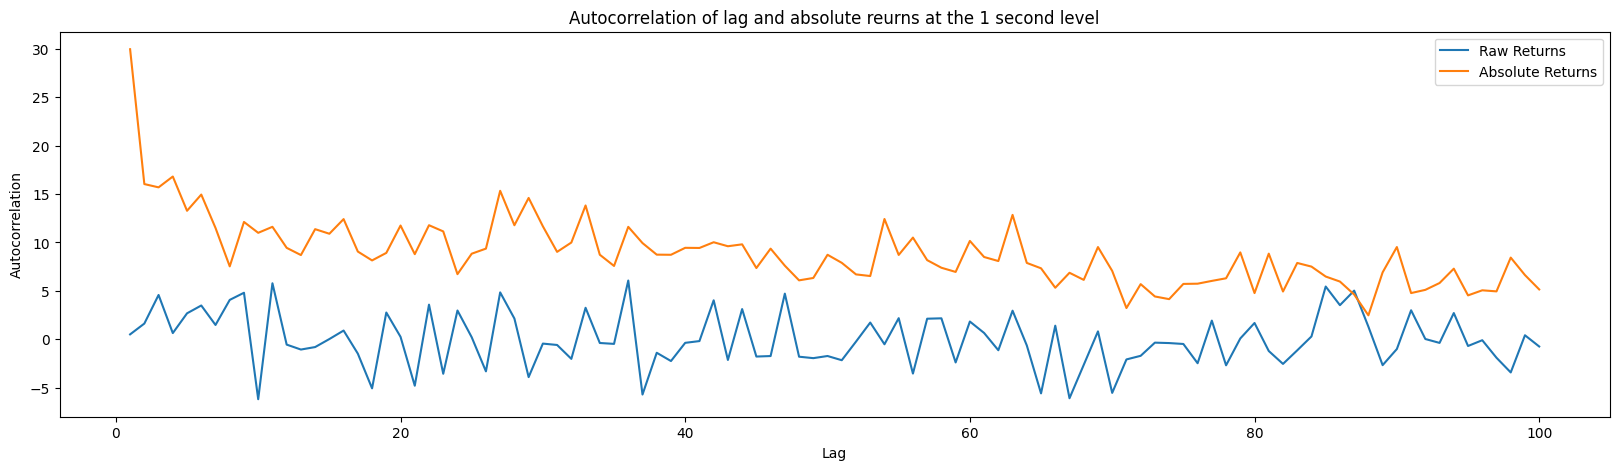

In [15]:
calculate_autocorr(df_1s, 100, '1 second')

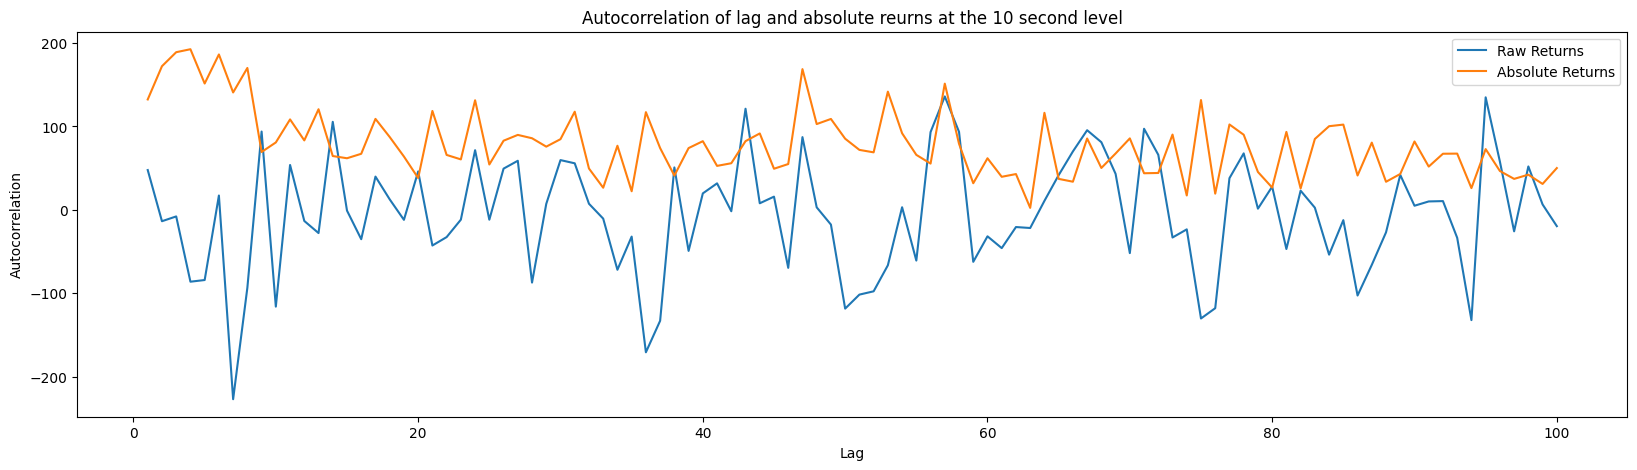

In [16]:
calculate_autocorr(df_10s, 100, '10 second')

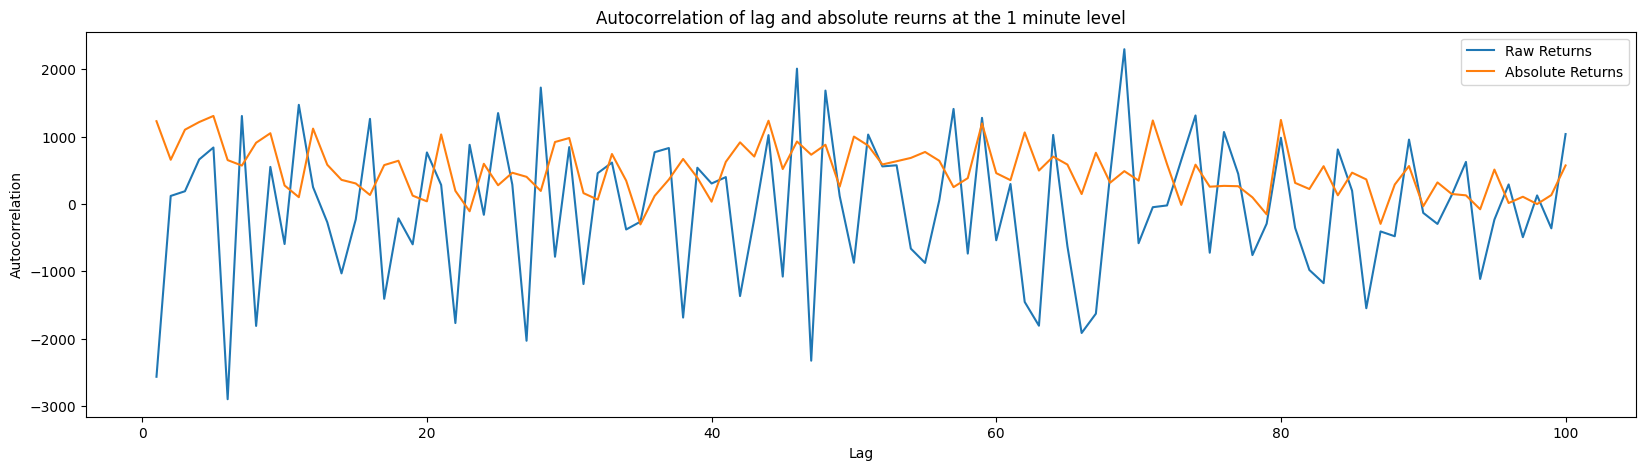

In [17]:
calculate_autocorr(df_60s, 100, '1 minute')

As frequency decreases the correlation of lags decreases in both metrics. We see that the autocorrelation of returns and absolute returns persists for $\approx$ 5-10 lags in the 1 second case. After which the absolute return slowly decreases and the normal return appears completely random. This suggests the presence of volatility clustering in the very short run. 

## Q7 Volatility estimation


In [18]:
print(f'The daily volatility at the 1 second level is {df_1s['log_return'].std()*100:.4f}')
print(f'The daily volatility at the 10 second level is {df_10s['log_return'].std()*100:.4f}')
print(f'The daily volatility at the 1 minute level is {df_60s['log_return'].std()*100:.4f}')


The daily volatility at the 1 second level is 0.0155
The daily volatility at the 10 second level is 0.0504
The daily volatility at the 1 minute level is 0.1240


# Q8 Autocorrelation fo returns and squared returns

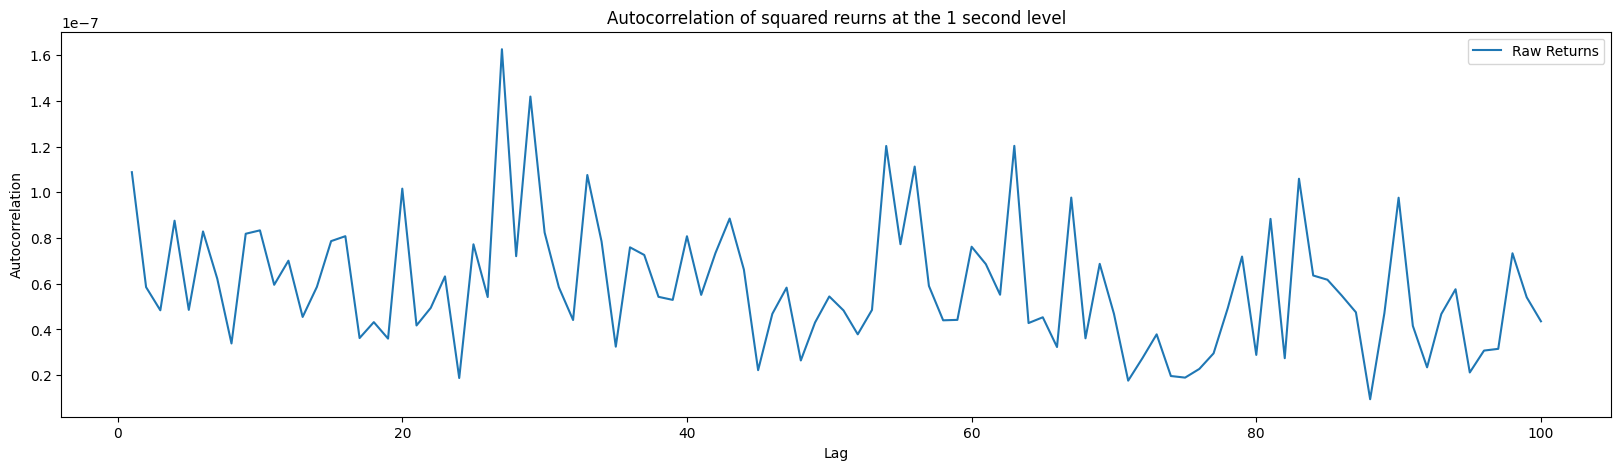

In [19]:
calculate_squared_autocorr(df_1s, 100, '1 second')

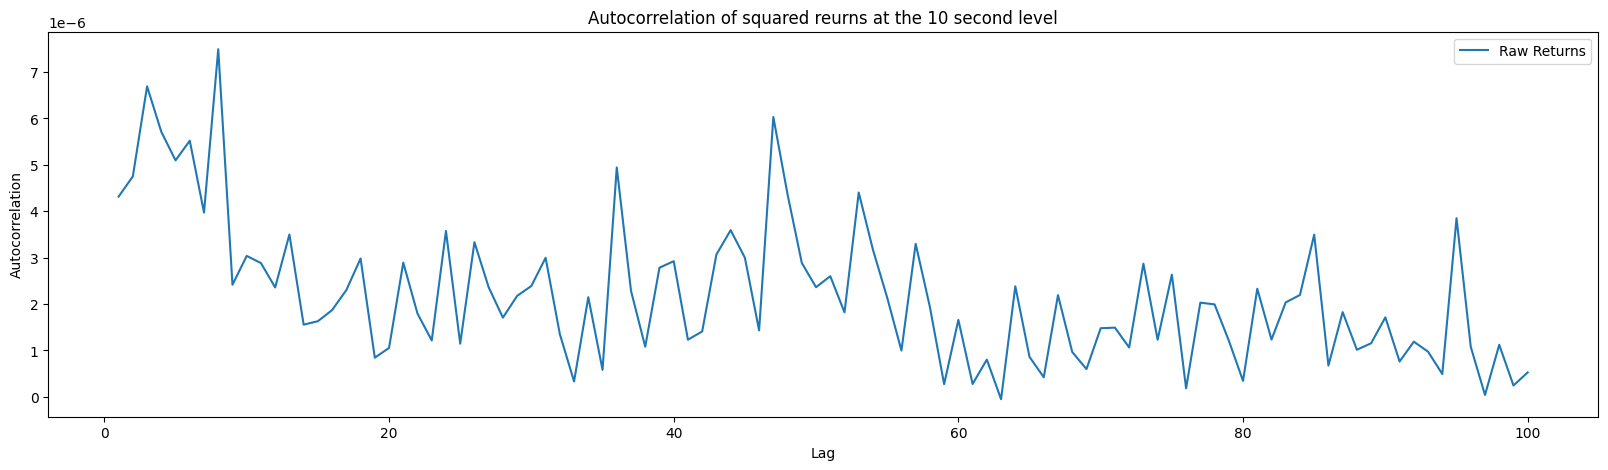

In [20]:
calculate_squared_autocorr(df_10s, 100, '10 second')

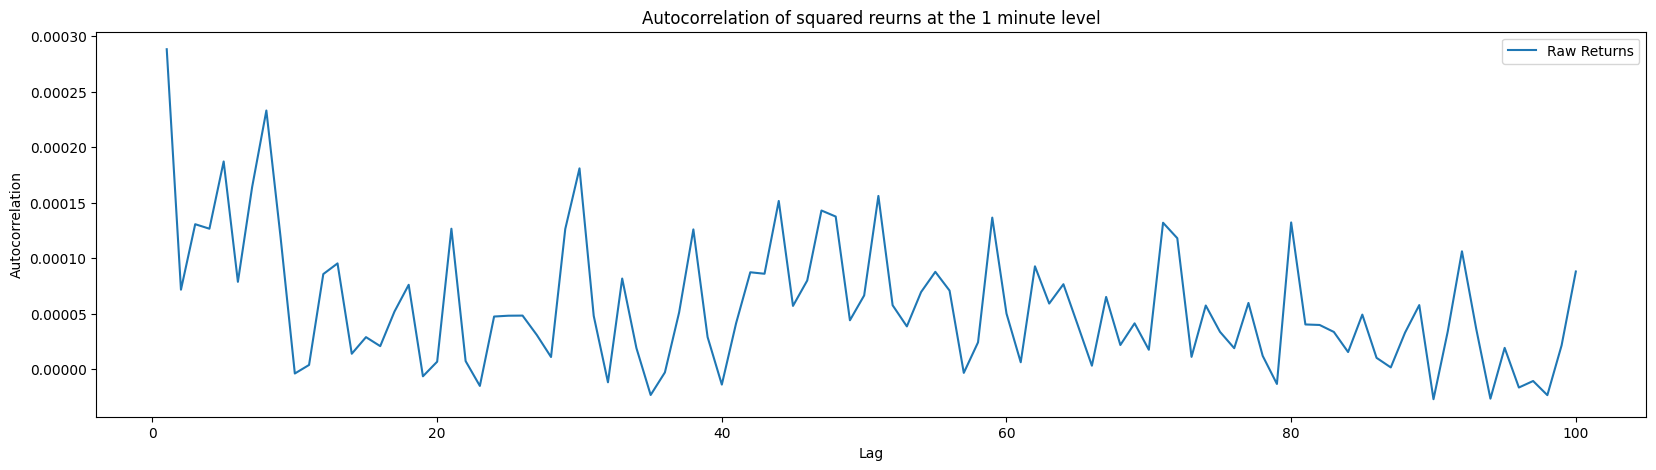

In [21]:
calculate_squared_autocorr(df_60s, 100, '1 minute')

From the 1 second data we can see a strong autocorrelation for the first 3 seconds after a trade, followed by flatlining and then sporadic values until t=20. In lower frequencies we see a more gradual decline at a far lower level. 

## Q9 Order direction autocorrelation

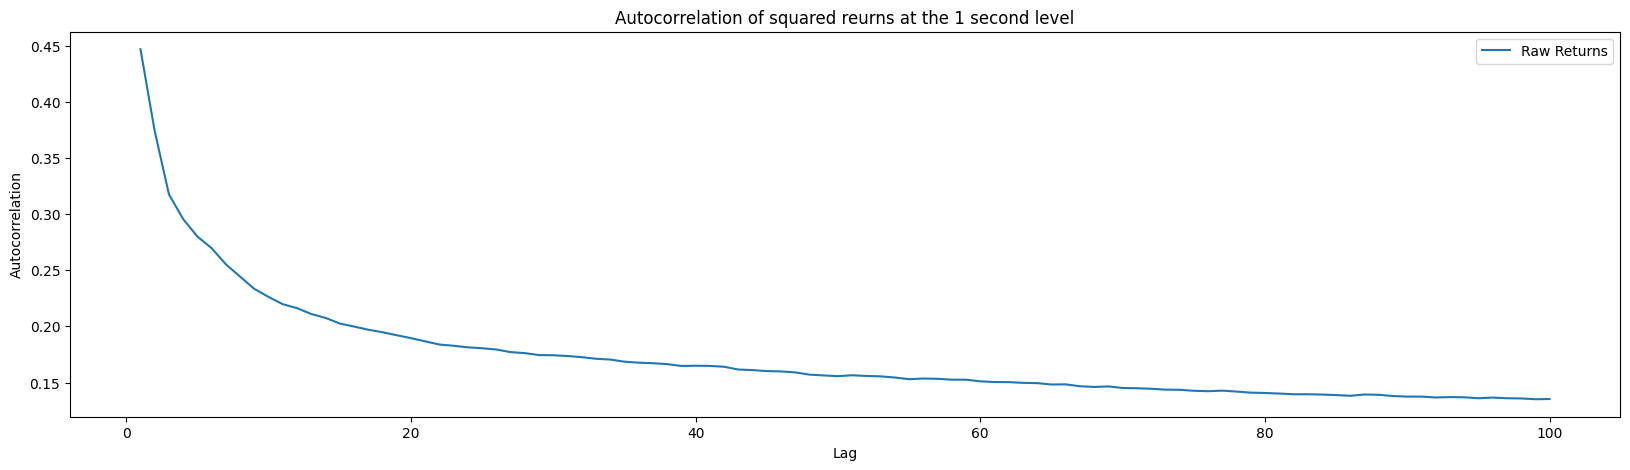

In [22]:
order_direction_autocorr(df, 100, '1 second')

Order direction is autocorrelated persistently and with an exponential style decline over time. This implies traders could be making child orders and offloading large positions in increments